<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


**ФИО: Щудро Виктория Игоревна** 

Тут будет мой любимый мем

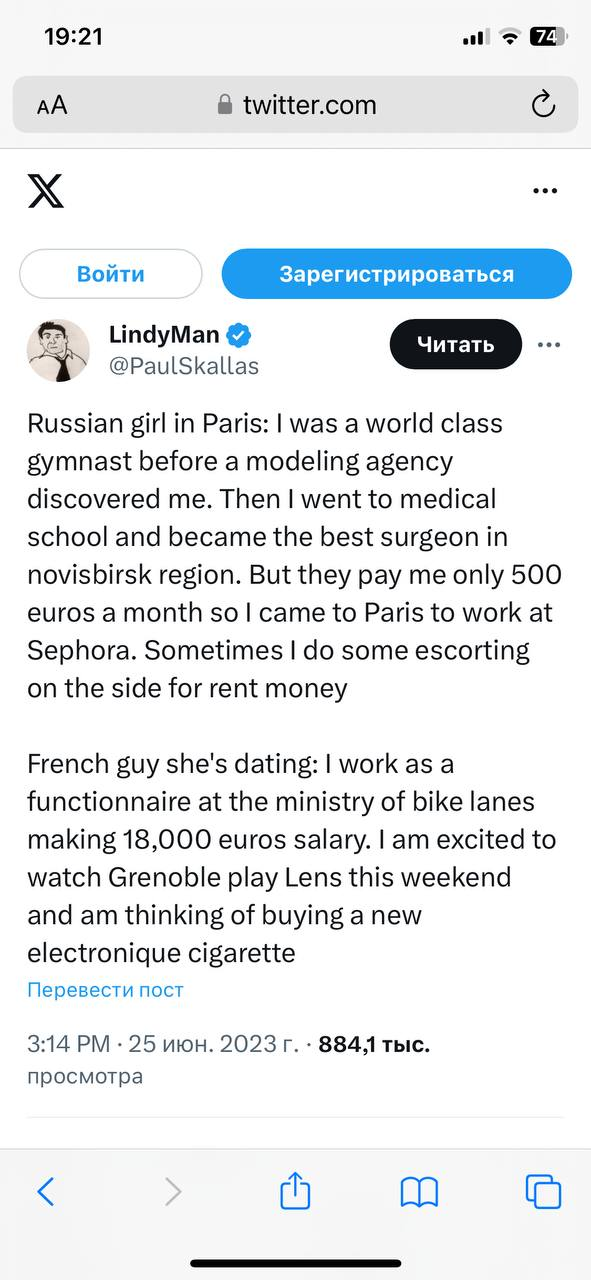

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [729]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [730]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [731]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [732]:


df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'], format = "%d.%m.%Y")
df_rates['Дата'] = pd.to_datetime(df_rates['Дата'], format = "%d.%m.%Y")
format(df_stocks['Дата']) #проверим, что формат в порядке
format(df_rates['Дата']) #проверим, что формат в порядке
format(df_rates['HKD_RUB'])

'0        4,237\n1        4,269\n2        4,282\n3        4,288\n4        4,289\n         ...  \n3647    11,731\n3648    11,325\n3649    11,429\n3650       NaN\n3651       NaN\nName: HKD_RUB, Length: 3652, dtype: object'

__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [733]:
def correct_values(column_data):
    corrected_value = column_data.replace('.', '').replace(',', '.').replace('%', '').replace('B', '').replace('M', '').replace('K', '')
    if 'B' in column_data:
        corrected_value = float(corrected_value) * 10**9
    elif 'M' in column_data:
        corrected_value = float(corrected_value) * 10**6
    elif 'K' in column_data:
        corrected_value = float(corrected_value) * 10**3
    else:
        corrected_value = float(corrected_value)
    return corrected_value







Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [734]:
columns_stocks = ['Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %']
for column in columns_stocks:
    df_stocks[column] = df_stocks[column].map(correct_values, na_action='ignore')

columns_rates = ['EUR_RUB', 'USD_RUB', 'HKD_RUB']
for column in columns_rates:
    df_rates[column] = df_rates[column].map(correct_values, na_action='ignore')
    
df_rates.head()

,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,2014-01-01,45.19,32.85,4.24
1,2014-01-02,45.25,33.10,4.27
2,2014-01-03,45.11,33.20,4.28
3,2014-01-04,45.12,33.25,4.29
4,2014-01-05,45.23,33.26,4.29


In [735]:
df_stocks.head(30) #тут я просто проверяла, что все ок в глубине датасета

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.00,-0.54,AAPL
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.00,0.22,AAPL
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.00,0.05,AAPL
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.00,-0.28,AAPL
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.00,-0.55,AAPL
5,2023-12-21,194.68,196.10,197.08,193.50,44080000.00,-0.08,AAPL
6,2023-12-20,194.83,196.90,197.68,194.83,50130000.00,-1.07,AAPL
7,2023-12-19,196.94,196.16,196.95,195.89,40230000.00,0.54,AAPL
8,2023-12-18,195.89,196.09,196.63,194.39,55750000.00,-0.85,AAPL
9,2023-12-15,197.57,197.53,198.40,197.00,128540000.00,-0.27,AAPL


__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [736]:
df_merged = df_stocks.merge(df_rates, right_on='Дата', left_on = 'Дата')

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.00,-0.54,AAPL,98.60,90.36,11.43
1,2023-12-29,100.78,100.76,101.30,100.70,342420.00,0.34,BMWG,98.60,90.36,11.43
2,2023-12-29,159.52,159.49,160.79,159.14,19270000.00,0.24,GAZP,98.60,90.36,11.43
3,2023-12-29,62.55,62.30,62.76,62.26,748680.00,0.47,MBGn,98.60,90.36,11.43
4,2023-12-29,376.04,376.00,377.16,373.48,18730000.00,0.20,MSFT,98.60,90.36,11.43


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [737]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
} 
#тут я переписала тот некрасивый код, не карайте....
# про iterrows прочитала тут https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
for index, row in df_merged.iterrows():
    currency_key = stocks_currency_dict.get(row['Тикер'])
    if currency_key:
        currency_rate = row[currency_key]
        df_merged.at[index, 'Цена'] *= currency_rate
        df_merged.at[index, 'Мин.'] *= currency_rate
        df_merged.at[index, 'Макс.'] *= currency_rate
        df_merged.at[index, 'Откр.'] *= currency_rate

df_merged.head()


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.01,17520.80,17565.98,17324.72,42670000.00,-0.54,AAPL,98.60,90.36,11.43
1,2023-12-29,9936.50,9934.53,9987.77,9928.62,342420.00,0.34,BMWG,98.60,90.36,11.43
2,2023-12-29,159.52,159.49,160.79,159.14,19270000.00,0.24,GAZP,98.60,90.36,11.43
3,2023-12-29,6167.18,6142.53,6187.88,6138.59,748680.00,0.47,MBGn,98.60,90.36,11.43
4,2023-12-29,33978.97,33975.36,34080.18,33747.65,18730000.00,0.20,MSFT,98.60,90.36,11.43


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [738]:
nan_values = df_merged.isnull().sum()

print(f"Количество пропусков в данных: {nan_values}")

no_tickers = df_merged[df_merged.isnull().any(axis=1)]['Тикер'].unique()

print(f"Тикеры с пропущенными данными: {no_tickers}")

no_date = df_merged[df_merged.isnull().any(axis=1)]['Дата'].unique()
print(f"Периоды с пропущенными данными: {no_date}")


df_merged = df_merged.dropna()

df_merged.head()

Количество пропусков в данных: Дата       0
Цена       0
Откр.      0
Макс.      0
Мин.       0
Объём      9
Изм. %     0
Тикер      0
EUR_RUB    0
USD_RUB    0
HKD_RUB    0
dtype: int64
Тикеры с пропущенными данными: ['BMWG' 'MBGn' 'AAPL' 'Tencent']
Периоды с пропущенными данными: <DatetimeArray>
['2022-11-21 00:00:00', '2022-05-04 00:00:00', '2022-05-03 00:00:00',
 '2022-05-02 00:00:00', '2022-04-25 00:00:00', '2016-02-27 00:00:00',
 '2015-01-17 00:00:00']
Length: 7, dtype: datetime64[ns]


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.01,17520.80,17565.98,17324.72,42670000.00,-0.54,AAPL,98.60,90.36,11.43
1,2023-12-29,9936.50,9934.53,9987.77,9928.62,342420.00,0.34,BMWG,98.60,90.36,11.43
2,2023-12-29,159.52,159.49,160.79,159.14,19270000.00,0.24,GAZP,98.60,90.36,11.43
3,2023-12-29,6167.18,6142.53,6187.88,6138.59,748680.00,0.47,MBGn,98.60,90.36,11.43
4,2023-12-29,33978.97,33975.36,34080.18,33747.65,18730000.00,0.20,MSFT,98.60,90.36,11.43


__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [739]:
# your code here
# (◕‿◕)♡
df_stocks['Тикер'].nunique()

7

__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [740]:
# your code here
# ♡ (´｡• ω •｡`) ♡
df_merged['Разница'] = df_merged['Макс.'] - df_merged['Мин.']
df_merged.head()

df_sorted = df_merged.sort_values(by = 'Разница', ascending = False)


In [741]:
df_sorted.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Разница
802,2023-07-18,32677.64,31435.95,33340.30,31103.25,64520000.00,3.98,MSFT,102.18,90.90,11.61,2237.05
3163,2022-02-24,24759.70,22903.92,24807.61,22820.71,56990000.00,5.11,MSFT,95.21,84.05,10.76,1986.89
3120,2022-03-08,35170.88,35419.50,36204.90,34425.00,48160000.00,-1.10,MSFT,118.99,127.50,16.31,1779.90
3312,2022-01-24,23349.81,23021.27,23408.11,21748.88,86040000.00,0.11,MSFT,89.23,78.79,10.09,1659.23
3125,2022-03-07,39884.13,41259.79,41425.67,39829.79,43160000.00,-3.78,MSFT,118.99,143.00,18.29,1595.88


__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [742]:
# your code here
# (⌒_⌒;)
df_sorted['Суммы торгов'] = df_sorted['Объём'] * df_sorted['Цена']
df_sorted = df_sorted.sort_values(by = 'Суммы торгов', ascending = False)

In [743]:
df_sorted.head(10)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Разница,Суммы торгов
5764,2020-08-24,9394.19,9606.17,9612.14,9250.88,345940000.00,1.20,AAPL,87.97,74.64,9.61,361.26,3249826226976.00
5771,2020-08-21,9302.88,8920.65,9340.28,8919.90,338050000.00,5.15,AAPL,88.21,74.80,9.64,420.38,3144837231800.00
5701,2020-09-04,9121.47,9054.36,9328.09,8362.10,332610000.00,0.07,AAPL,89.25,75.41,9.70,965.99,3033893014790.40
5876,2020-07-31,7906.91,7655.40,7918.82,7502.86,374300000.00,10.47,AAPL,87.56,74.41,9.58,415.96,2959557483498.00
3117,2022-03-08,20073.60,20249.55,20767.20,19864.50,131150000.00,-1.17,AAPL,118.99,127.50,16.31,902.70,2632652640000.00
64,2023-12-15,33467.65,33117.38,33618.41,33065.93,78500000.00,1.31,MSFT,98.55,90.28,11.62,552.48,2627210583875.00
3469,2021-12-17,12687.12,12597.42,12859.85,12579.63,195920000.00,-0.65,AAPL,83.36,74.13,9.49,280.22,2485660867790.40
5869,2020-08-03,7965.15,7911.04,8162.56,7888.38,308150000.00,2.52,AAPL,86.02,73.11,9.41,274.18,2454460387015.00
5522,2020-10-13,9330.63,9651.93,9661.17,9218.91,262330000.00,-2.65,AAPL,90.47,77.05,9.92,442.26,2447705190987.00
3280,2022-01-28,13256.44,12896.88,13258.00,12670.40,179940000.00,6.98,AAPL,86.80,77.83,10.02,587.60,2385364396605.60


__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [744]:
# your code here
# (＠_＠)
df_sorted['Изм. %'] = df_sorted['Изм. %'].abs()
avg_changes = df_sorted.groupby('Дата')['Изм. %'].mean()


top_5_dates = avg_changes.nlargest(5).reset_index()

top_5_dates




,Дата,Изм. %
0,2022-02-24,13.08
1,2016-02-29,11.84
2,2020-03-24,10.80
3,2020-03-12,10.62
4,2022-02-21,9.13


__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [745]:
top_5_diff = top_5_dates

top_5_diff



,Дата,Изм. %
0,2022-02-24,13.08
1,2016-02-29,11.84
2,2020-03-24,10.80
3,2020-03-12,10.62
4,2022-02-21,9.13


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [746]:
df = df_sorted.pivot_table(index='Дата', columns = "Тикер", values = 'Цена')

df.head(10)

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,653.73,3780.52,NaN,2789.91,1230.00,418.02,NaN
2014-01-03,641.42,3788.67,NaN,2784.89,1225.41,410.56,NaN
2014-01-06,645.27,3756.04,135.47,2785.24,1199.88,411.98,0.05
2014-01-07,639.27,3770.03,NaN,2815.68,1206.63,409.79,NaN
2014-01-08,643.97,3803.54,137.33,2801.88,1186.41,416.52,0.05
2014-01-09,636.36,3789.88,138.68,2808.74,1180.06,409.84,0.05
2014-01-10,628.03,3751.06,139.69,2801.91,1189.39,410.87,0.05
2014-01-13,636.80,3829.75,139.08,2861.28,1164.41,413.76,0.05
2014-01-14,650.03,3833.94,137.44,2900.06,1192.12,411.18,0.05


__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__

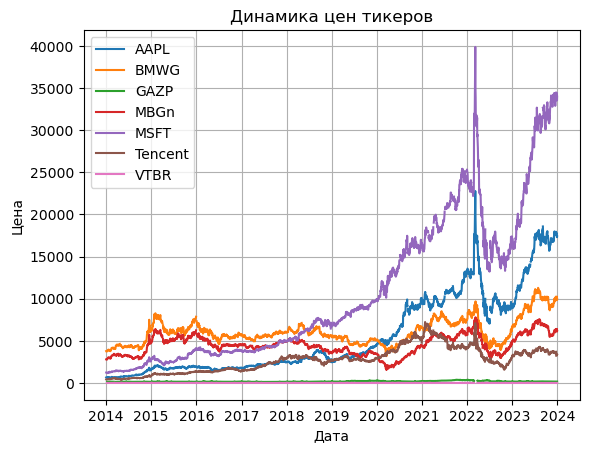

In [747]:

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Динамика цен тикеров')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

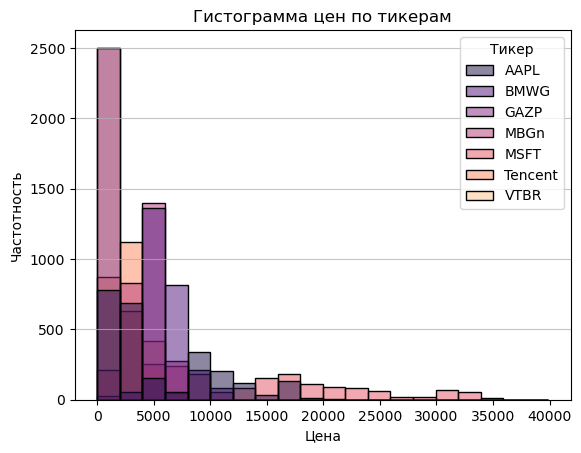

In [748]:
sns.histplot(data= df, kde=False, bins=20, alpha=0.5, palette='magma')
plt.title('Гистограмма цен по тикерам')
plt.xlabel('Цена')
plt.ylabel('Частотность')
plt.grid(axis='y', alpha=0.75)
plt.show()

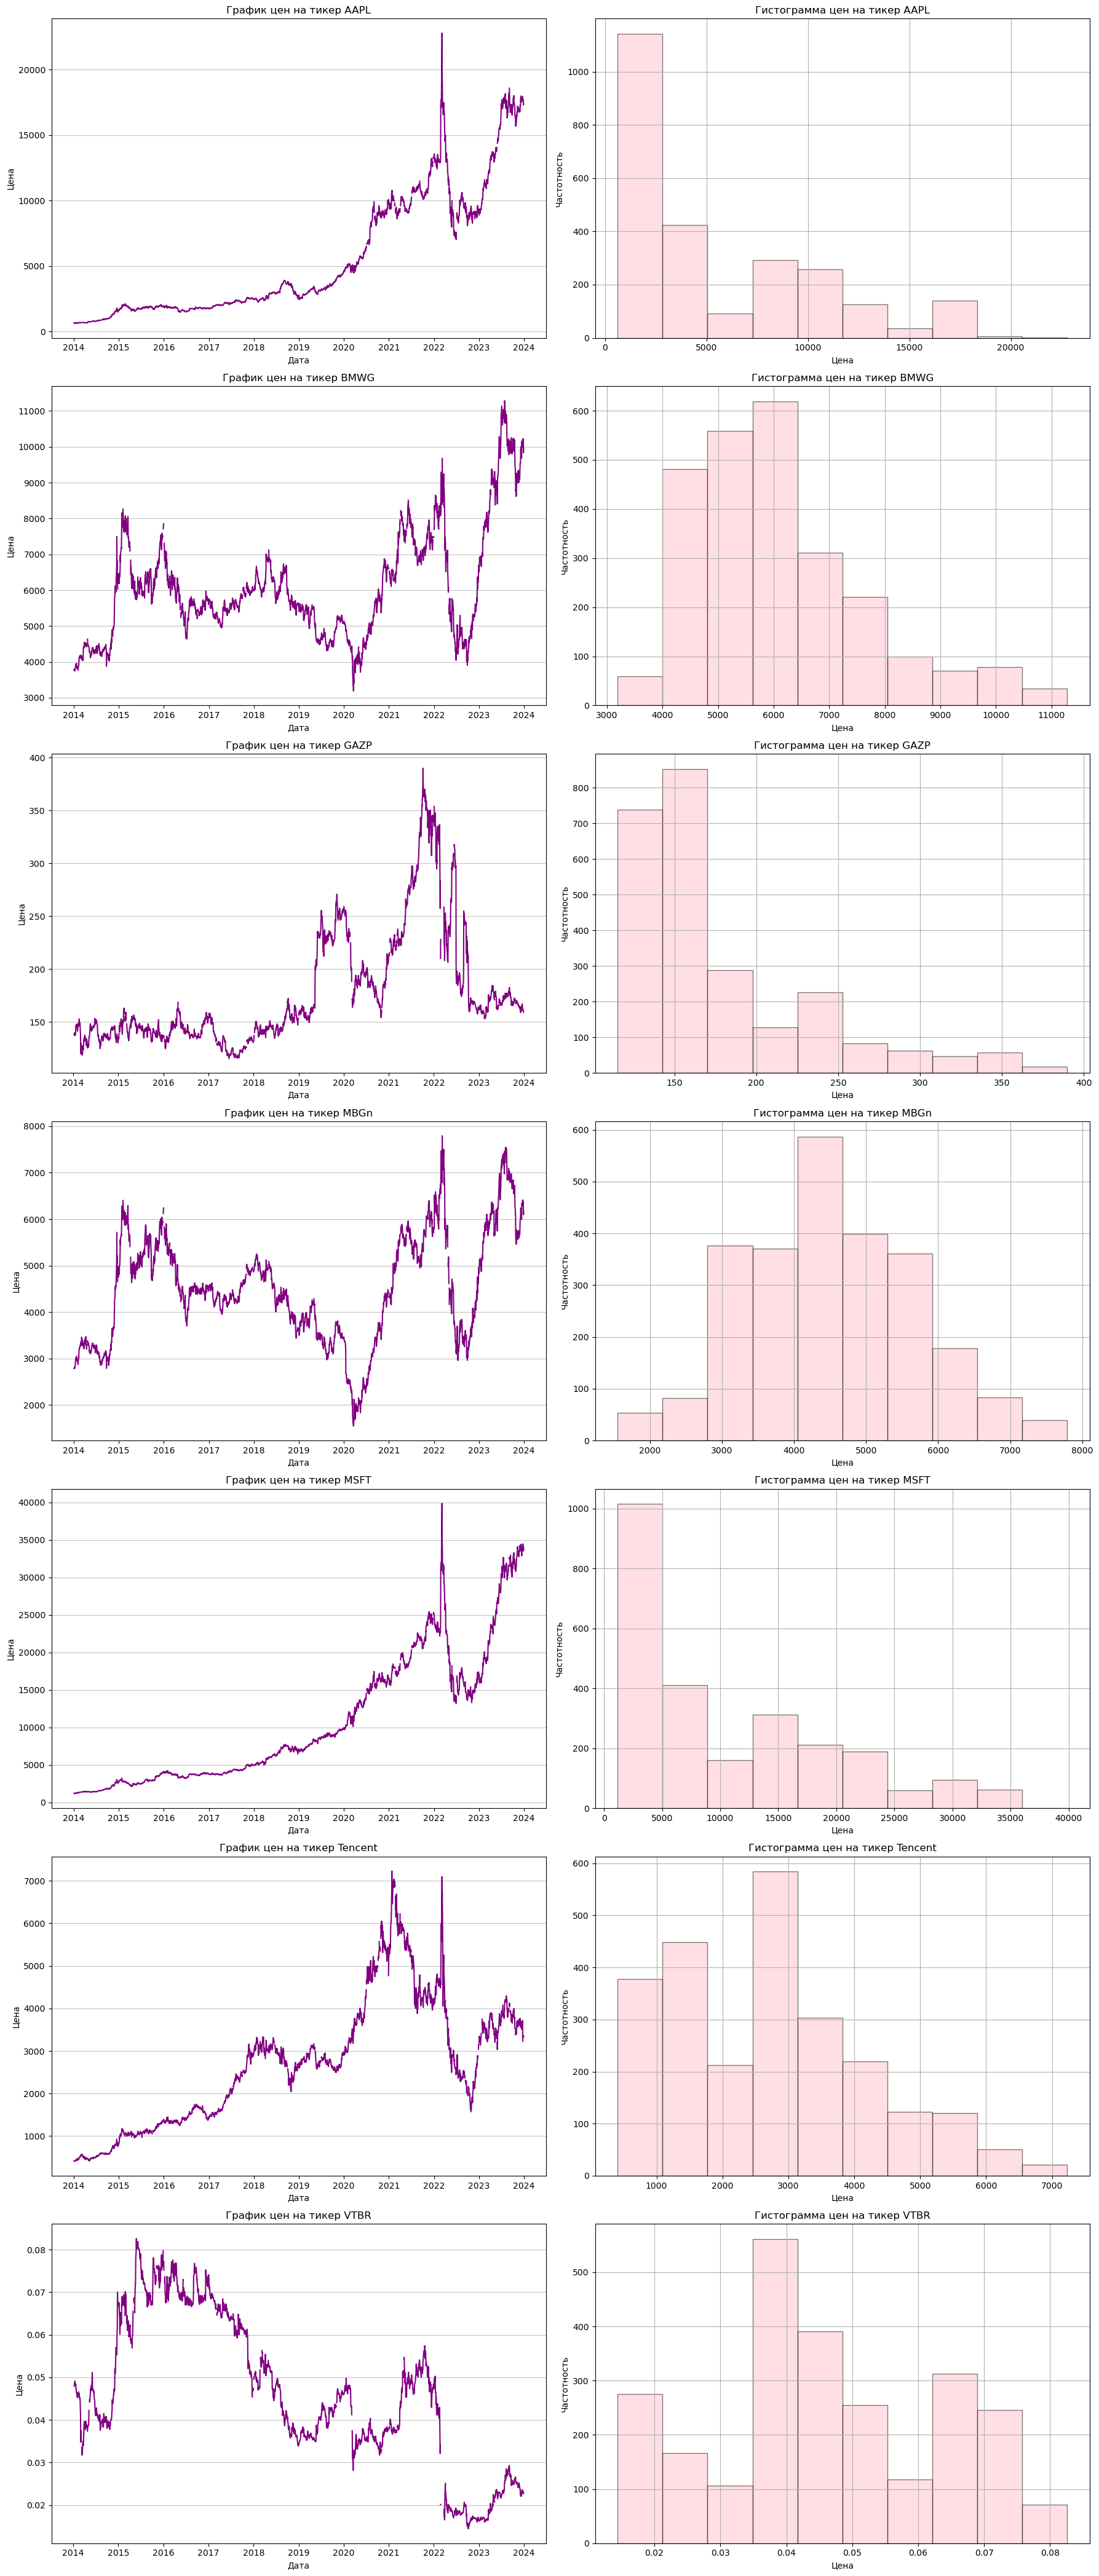

In [749]:
tickers = df.columns[0:]

fig, axs = plt.subplots(len(tickers), 2, figsize=(18, 6 * len(tickers)))

for i, ticker in enumerate(tickers):
    data = df[ticker]

    axs[i, 0].plot(df.index, data, label=ticker, color = 'purple')  
    axs[i, 0].set_title(f'График цен на тикер {ticker}')
    axs[i, 0].set_xlabel('Дата')
    axs[i, 0].set_ylabel('Цена')
    axs[i, 0].grid(axis='y', alpha=0.75)
    
    axs[i, 1].hist(data, bins=10, alpha=0.5, color = 'pink', edgecolor='black' ) 
    axs[i, 1].set_title(f'Гистограмма цен на тикер {ticker}')
    axs[i, 1].set_xlabel('Цена')
    axs[i, 1].set_ylabel('Частотность')
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


- Распределение стоимостей акций на нормальное не похоже: как можно заметить, мода находится крайне сильно слева, а не по центру; распределение несимметрично; у получившегося распределения только один хвост, а не два; не наблюдается концентрация вокруг среднего значения. Похоже на нормальное распределение только у тикера Мерседес-Бенц 
групп. 
- Как мы видим из графика динамики цен на тикеры, выводы о состоянии финансовых рынков сложно назвать однозначными. Есть тикеры, которые имели стабильную и четкую тенденцию к росту: это, например, MSFT и AAPL, в то время как другие тикеры не показывали такую положительную динамику (Tencent, MBGn, BMWG). Поэтому, исходя из полученных данных, можно говорить о росте скорее не финансового рынка, а рынка технологий и инноваций: два самых "растущих" тикера принадлежат Apple и Microsoft, в то время как тикеры Мерседес-Бенц Групп остались практически без изменений. В данном контексте отраслевого размежевания можно было бы подумать в сторону поведения акций роста и акций стоимости, однако, в данном случае видно, что эти понятия едва ли объясняют поведение тикеров, поскольку т.н. "акции стоимости" не изменили своей стоимости за десять лет, а если бы рынок реально рос, то они бы тоже демонстрировали рост, пусть и более умеренный, по сравнению с акциями роста. При этом акции российских компаний не двигались почти никак: тикеры Газпрома и ВТБ практически всегда неотличимы от нуля.
- Касательно кризисов: на графике мы точно можем отследить негативные шоки, например, 2020 года (пандемия, видно, как некоторые тикеры ненадолго просели в цене, но это особо не коснулось бигтехов), а затем большой кризис 2022-2023 годов (проблематизация международной обстановки). Особенно это видно на так называемых акциях роста - они проседают глубже, чем акции стоимости во время кризиса (эталонный пример - большая "яма" у тикера Apple в 2022 году по сравнению с тикером BMWG)

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [750]:
df_pct_change = df.pct_change().multiply(100)

df_pct_change.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-1.88,0.22,NaN,-0.18,-0.37,-1.79,NaN
2014-01-06,0.60,-0.86,NaN,0.01,-2.08,0.35,NaN
2014-01-07,-0.93,0.37,0.00,1.09,0.56,-0.53,0.00
2014-01-08,0.73,0.89,1.37,-0.49,-1.68,1.64,-1.13


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__ 
- Доходности по акциям имеют распределение, более близкое к нормальному, однако едва ли можно сказать, что распределение прямо "нормально". Дело в том, что приближенно прослеживается стандартная куполообразная форма нормального распределения, более-менее есть концентрация вокруг среднего, с некоторыми коррективами можно сказать, что есть определенная симметричность и наличие двух хвостов в распределении. Однако, повторюсь - для нормального оно недостаточно симметрично и слишком централизованно вокруг модального значения. 
- В данных действительно довольно много выбросов: можно посмотреть по графику ящика с усами, что за пределами полутора интерквартильного размаха плюс/минус верхний/нижний квартиль остается очень много точек - это и есть выбросы.

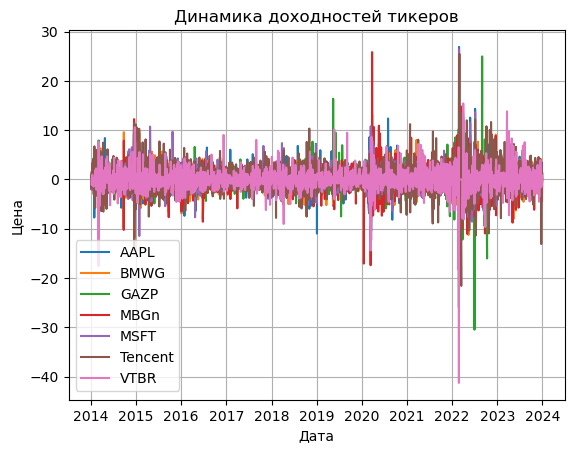

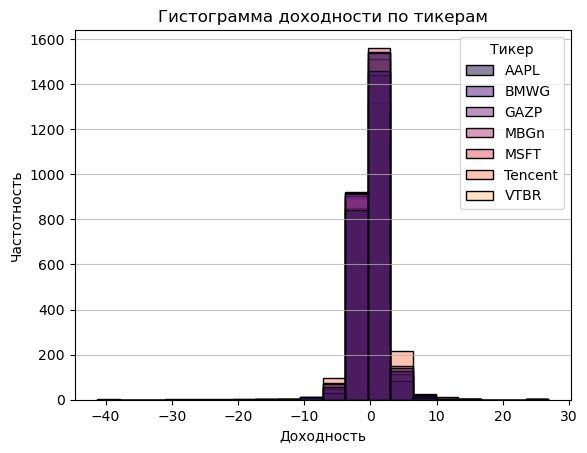

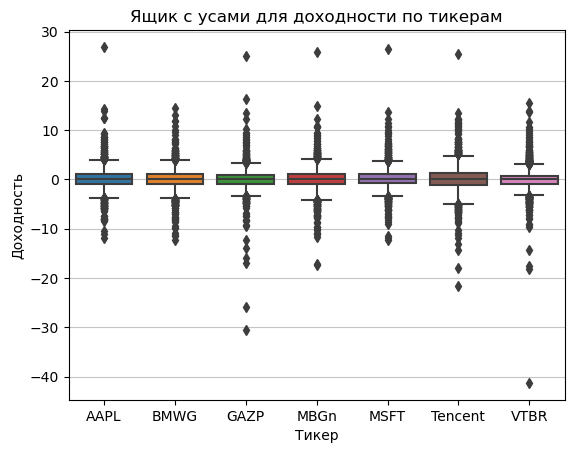

In [751]:

for column in df_pct_change.columns:
    plt.plot(df.index, df_pct_change[column], label=column)

plt.title('Динамика доходностей тикеров')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend(bbox_to_anchor=(0, 0.45), loc='upper left') 
plt.grid(True)
plt.show()


sns.histplot(data= df_pct_change, kde=False, bins=20, alpha=0.5, palette='magma')
plt.title('Гистограмма доходности по тикерам')
plt.xlabel('Доходность')
plt.ylabel('Частотность')
plt.grid(axis='y', alpha=0.75)
plt.show()

sns.boxplot(data = df_pct_change)
plt.title('Ящик с усами для доходности по тикерам')
plt.ylabel('Доходность')
plt.grid(axis='y', alpha=0.75)
plt.show()

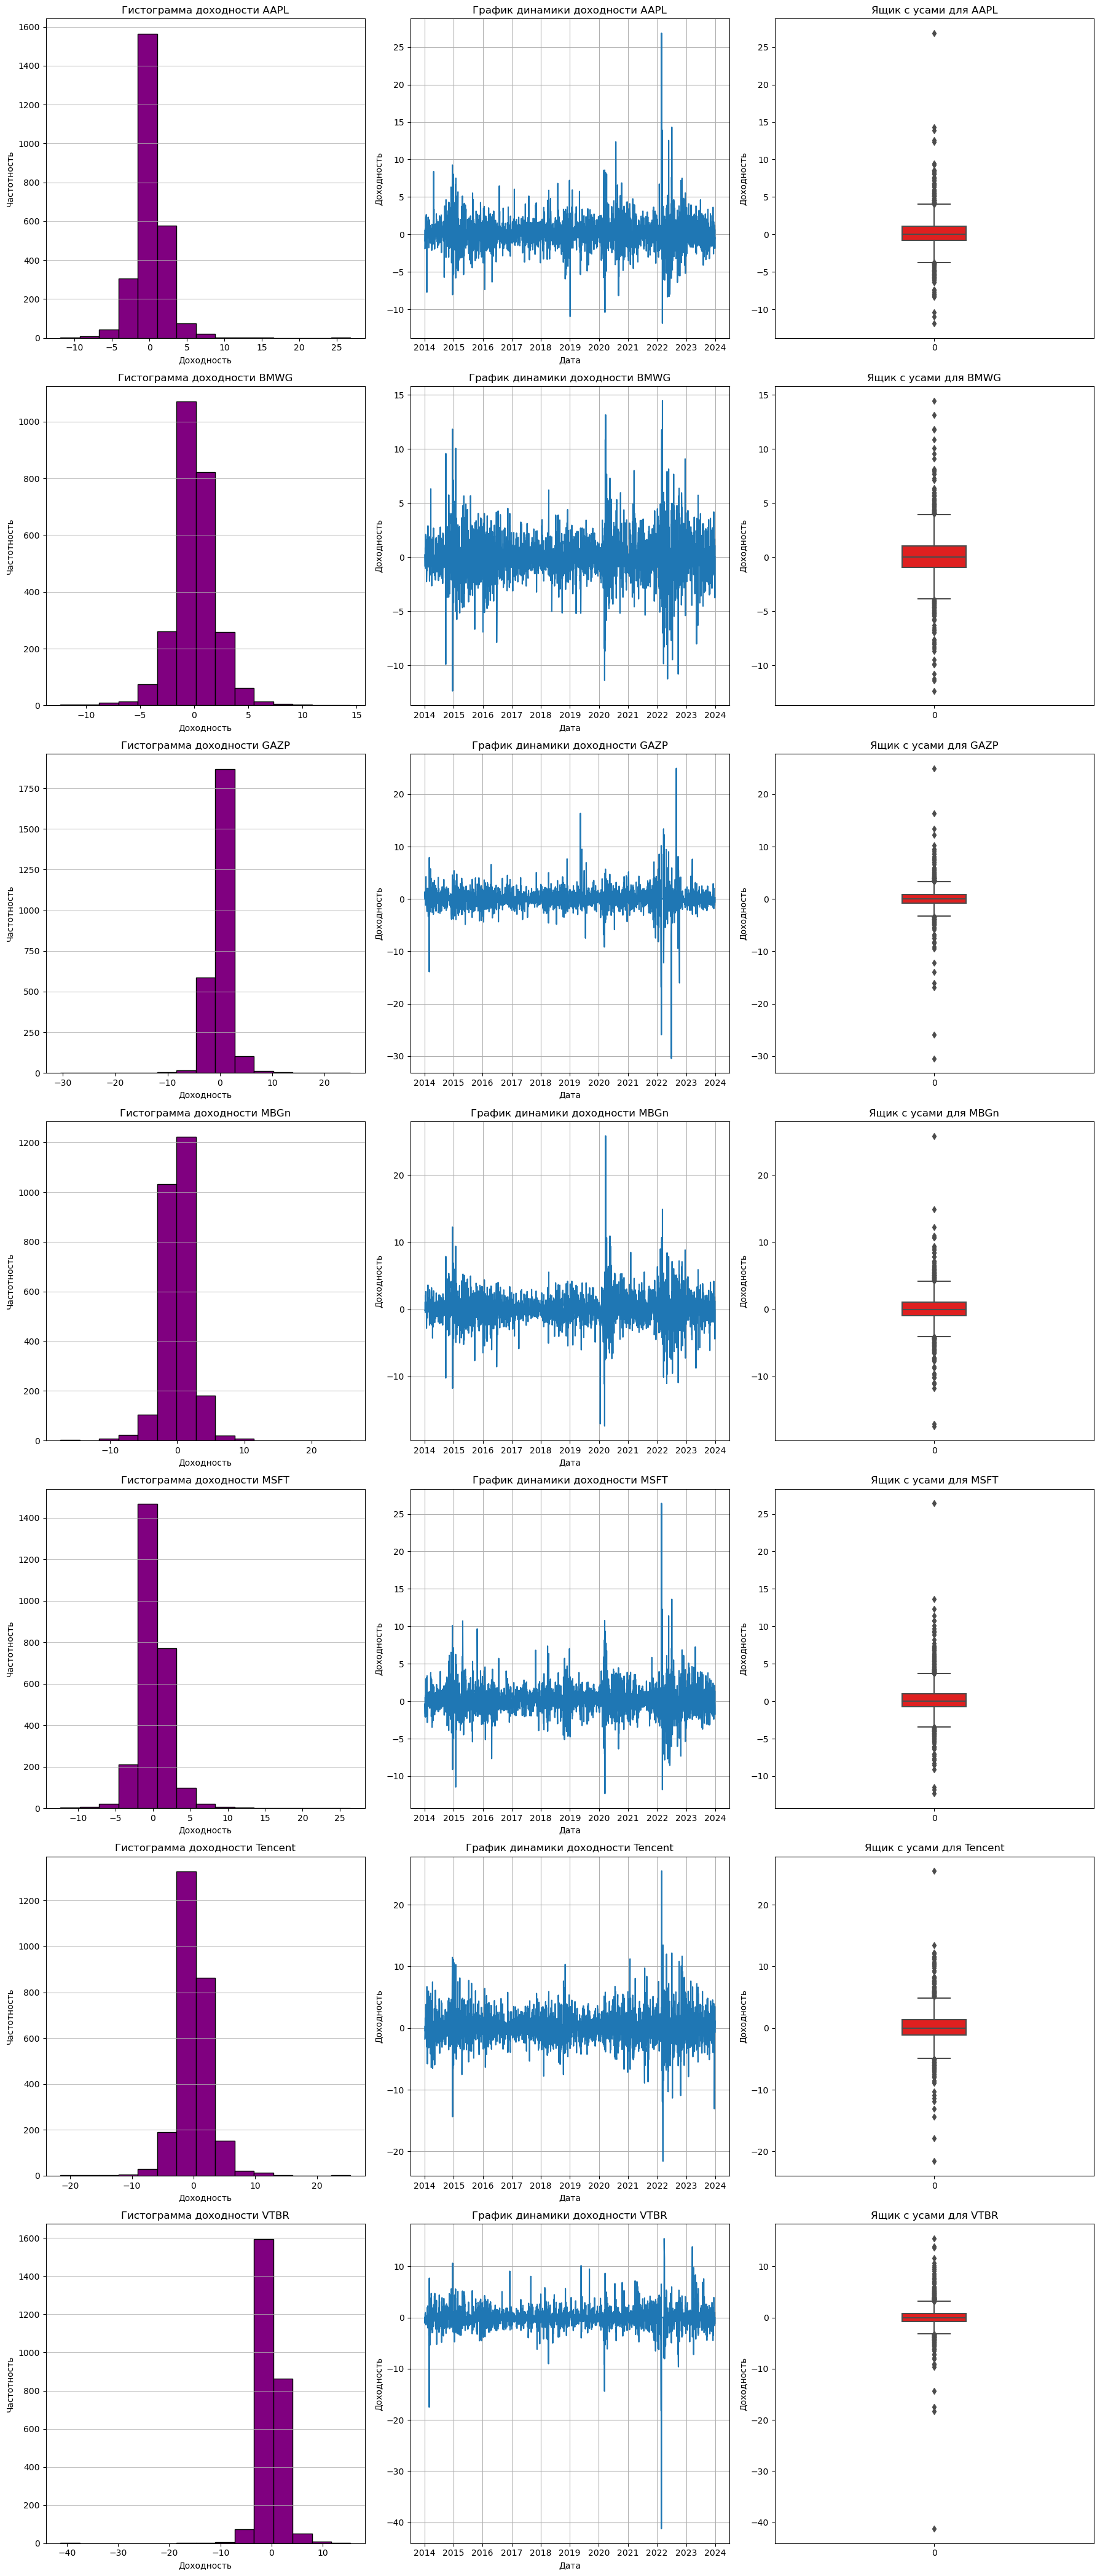

In [752]:

tickers = df_pct_change.columns[0:]

fig, axs = plt.subplots(len(tickers), 3, figsize=(18, 6 * len(tickers)))

for i, ticker in enumerate(tickers):
    data = df_pct_change[ticker]

    axs[i, 0].hist(data, bins=15, color='purple', edgecolor='black')
    axs[i, 0].set_title(f'Гистограмма доходности {ticker}')
    axs[i, 0].set_xlabel('Доходность')
    axs[i, 0].set_ylabel('Частотность')
    axs[i, 0].grid(axis='y', alpha=0.75)
    
    axs[i, 1].plot(data.index, data)
    axs[i, 1].set_title(f'График динамики доходности {ticker}')
    axs[i, 1].set_xlabel('Дата')
    axs[i, 1].set_ylabel('Доходность')
    axs[i, 1].grid(True)

    sns.boxplot(data, ax=axs[i, 2], width=0.2, color='red')
    axs[i, 2].set_title(f'Ящик с усами для {ticker}')
    axs[i, 2].set_ylabel('Доходность')
    
plt.tight_layout()
plt.show()

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [753]:

df_pct_change_mean = abs(df_pct_change).mean(axis = 1) 
top_5_diff['Изм. (RUB) %'] = df_pct_change_mean.loc[['2022-02-24', '2016-02-29', '2020-03-24', '2020-03-12', '2022-02-21']].to_list()

top_5_diff

,Дата,Изм. %,Изм. (RUB) %
0,2022-02-24,13.08,12.68
1,2016-02-29,11.84,1.63
2,2020-03-24,10.80,9.70
3,2020-03-12,10.62,9.20
4,2022-02-21,9.13,5.44


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__
В пересчете на рубли процентное изменение акций стало меньше, потому что в состав факторов, которые могли повлиять на волатильность цены, входит валютный риск. Если провести некую декомпозицию и очистить данные от валютного риска, то колебания цен также сократятся, что и видно из таблицы. 

## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [754]:
w =  np.arange(0, 1.01, 0.01)

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [755]:
df_pct_change['AAPL'] = df_pct_change['AAPL'] / 100
df_pct_change['Tencent'] = df_pct_change['Tencent'] / 100

r1 = df_pct_change['AAPL'].mean()
r2 = df_pct_change['Tencent'].mean()
annual_r1 = (1 + r1) ** 252 - 1  
annual_r2 = (1 + r2) ** 252 - 1


__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [756]:
sd1 = df_pct_change['AAPL'].std()
sd2 = df_pct_change['Tencent'].std()


annual_sd1 = sd1 * np.sqrt(252)
annual_sd2 = sd2 * np.sqrt(252)


In [757]:
annual_sd1

0.3315605806599849

In [758]:
annual_sd2

0.4092074682339811

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [759]:
rho = df_pct_change[['AAPL', 'Tencent']].corr().iloc[0, 1]


In [760]:
rho

0.26314132158240383

Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [761]:
r_p2 = w * annual_r1 +(1 - w) * annual_r2
sd_p2 = np.sqrt(w**2 * annual_sd1**2 + (1 - w)**2 * annual_sd2**2 + 2 * w * (1 - w) * rho * annual_sd1 * annual_sd2)

In [762]:
r_p2

array([0.32952831, 0.33073143, 0.33193455, 0.33313767, 0.33434078,
       0.3355439 , 0.33674702, 0.33795014, 0.33915325, 0.34035637,
       0.34155949, 0.34276261, 0.34396573, 0.34516884, 0.34637196,
       0.34757508, 0.3487782 , 0.34998131, 0.35118443, 0.35238755,
       0.35359067, 0.35479379, 0.3559969 , 0.35720002, 0.35840314,
       0.35960626, 0.36080937, 0.36201249, 0.36321561, 0.36441873,
       0.36562184, 0.36682496, 0.36802808, 0.3692312 , 0.37043432,
       0.37163743, 0.37284055, 0.37404367, 0.37524679, 0.3764499 ,
       0.37765302, 0.37885614, 0.38005926, 0.38126237, 0.38246549,
       0.38366861, 0.38487173, 0.38607485, 0.38727796, 0.38848108,
       0.3896842 , 0.39088732, 0.39209043, 0.39329355, 0.39449667,
       0.39569979, 0.39690291, 0.39810602, 0.39930914, 0.40051226,
       0.40171538, 0.40291849, 0.40412161, 0.40532473, 0.40652785,
       0.40773096, 0.40893408, 0.4101372 , 0.41134032, 0.41254344,
       0.41374655, 0.41494967, 0.41615279, 0.41735591, 0.41855

In [763]:
sd_p2

array([0.40920747, 0.40600047, 0.40281907, 0.39966389, 0.39653554,
       0.39343468, 0.39036195, 0.38731803, 0.3843036 , 0.38131935,
       0.37836601, 0.3754443 , 0.37255497, 0.36969877, 0.36687648,
       0.36408889, 0.3613368 , 0.35862103, 0.35594241, 0.35330178,
       0.35070001, 0.34813796, 0.34561652, 0.34313658, 0.34069905,
       0.33830484, 0.33595489, 0.33365012, 0.33139148, 0.32917993,
       0.3270164 , 0.32490187, 0.3228373 , 0.32082365, 0.31886188,
       0.31695297, 0.31509786, 0.31329752, 0.3115529 , 0.30986493,
       0.30823454, 0.30666267, 0.3051502 , 0.30369803, 0.30230702,
       0.30097803, 0.29971188, 0.29850937, 0.29737127, 0.29629832,
       0.29529124, 0.29435069, 0.29347732, 0.29267174, 0.29193449,
       0.2912661 , 0.29066706, 0.29013777, 0.28967863, 0.28928998,
       0.28897209, 0.2887252 , 0.28854949, 0.28844509, 0.28841208,
       0.28845049, 0.28856028, 0.28874137, 0.28899364, 0.28931689,
       0.28971088, 0.29017533, 0.29070991, 0.29131421, 0.29198

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

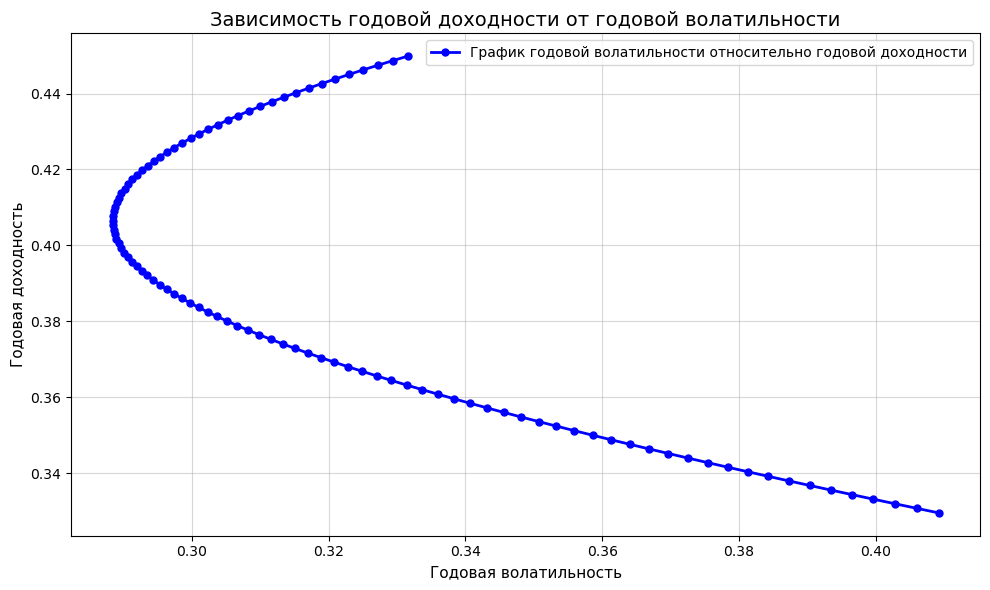

In [764]:
plt.figure(figsize=(10, 6))
plt.plot(sd_p2, r_p2, color='blue', linestyle='-', linewidth=2, marker='o', markersize=5, label='График годовой волатильности относительно годовой доходности')
plt.xlabel('Годовая волатильность', fontsize=11)
plt.ylabel('Годовая доходность', fontsize=11)
plt.title('Зависимость годовой доходности от годовой волатильности', fontsize=14)
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [765]:
df_r = {'Вес': w, 'Риск': sd_p2, 'Доходность': r_p2}

df_r = pd.DataFrame(df_r)

df_r

,Вес,Риск,Доходность
0,0.00,0.41,0.33
1,0.01,0.41,0.33
2,0.02,0.40,0.33
3,0.03,0.40,0.33
4,0.04,0.40,0.33
...,...,...,...
96,0.96,0.32,0.45
97,0.97,0.33,0.45
98,0.98,0.33,0.45
99,0.99,0.33,0.45


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [766]:
min_sd = df_r['Риск'].min()
min_sd_p = df_r.loc[df_r['Риск'].idxmin()]

In [767]:
min_sd

0.2884120826898322

In [768]:
min_sd_p

Вес          0.64
Риск         0.29
Доходность   0.41
Name: 64, dtype: float64

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [769]:
df_eff_p = df_r[(df_r['Риск'] > min_sd) & (df_r['Доходность'] > df_r.loc[df_r['Риск'].idxmin(), 'Доходность'])]

In [770]:
df_eff_p

,Вес,Риск,Доходность
65,0.65,0.29,0.41
66,0.66,0.29,0.41
67,0.67,0.29,0.41
68,0.68,0.29,0.41
69,0.69,0.29,0.41
70,0.70,0.29,0.41
71,0.71,0.29,0.41
72,0.72,0.29,0.42
73,0.73,0.29,0.42
74,0.74,0.29,0.42


__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

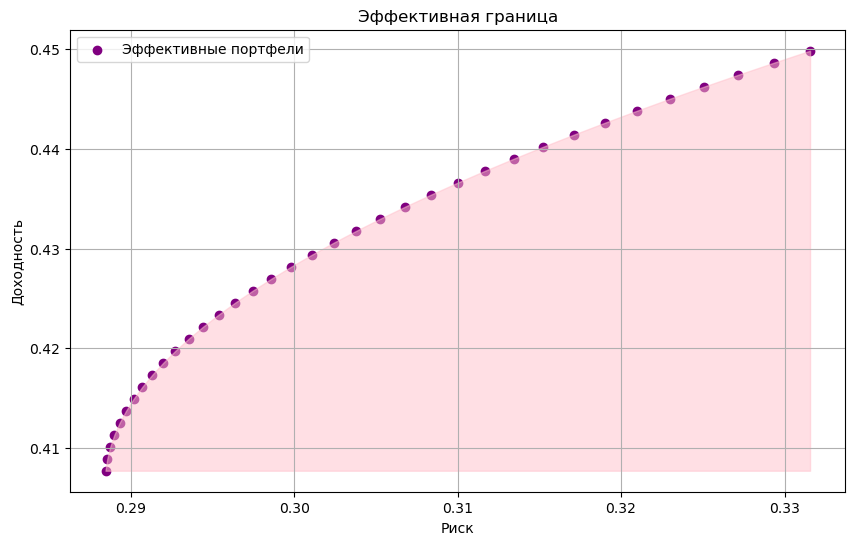

In [771]:

returns = df_eff_p['Доходность']
risks = df_eff_p['Риск']


plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, label='Эффективные портфели', color='purple')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Эффективная граница')
plt.grid(True)
plt.legend()

min_volatility = df_eff_p['Риск'].idxmin()
plt.fill_between(risks, returns, df_eff_p.loc[min_volatility, 'Доходность'], color='pink', alpha=0.5)
#тут мы закрасили те портфели, которые находятся по кривой выше портфеля с минимальной волатильностью 
plt.show()

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [772]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [773]:
df_r['Sharp'] = (df_r['Доходность'] - r_f) / df_r['Риск']

In [774]:
df_r

,Вес,Риск,Доходность,Sharp
0,0.00,0.41,0.33,0.52
1,0.01,0.41,0.33,0.52
2,0.02,0.40,0.33,0.53
3,0.03,0.40,0.33,0.54
4,0.04,0.40,0.33,0.55
...,...,...,...,...
96,0.96,0.32,0.45,1.01
97,0.97,0.33,0.45,1.01
98,0.98,0.33,0.45,1.01
99,0.99,0.33,0.45,1.00


__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [775]:
max_sharp = df_r['Sharp'].max()


In [776]:
max_sharp

1.034771897838607

In [777]:
max_sharp_p = df_r.loc[df_r['Sharp'].idxmax()]

In [778]:
max_sharp_p

Вес          0.81
Риск         0.30
Доходность   0.43
Sharp        1.03
Name: 81, dtype: float64

In [779]:
max_sharp_sd =  df_r.loc[df_r['Sharp'].idxmax(), 'Риск']

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [780]:
sigma = np.array([min_sd, max_sharp_sd])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [781]:

r = np.array([max_sharp * min_sd + r_f, max_sharp * max_sharp_sd + r_f])

r

array([0.41644072, 0.42698085])

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

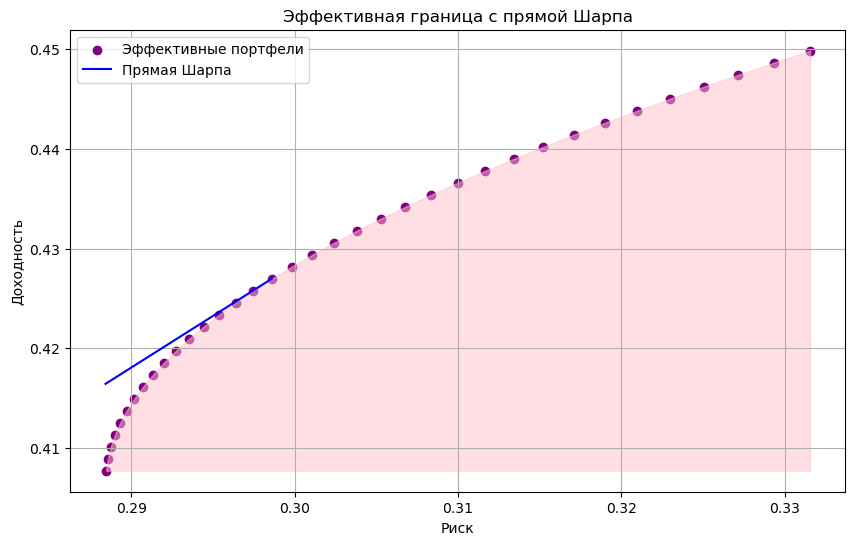

In [782]:
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, label='Эффективные портфели', color='purple')
plt.plot(sigma, r, label='Прямая Шарпа', color='blue')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Эффективная граница с прямой Шарпа')
plt.grid(True)
plt.legend()
min_volatility = df_eff_p['Риск'].idxmin()
plt.fill_between(risks, returns, df_eff_p.loc[min_volatility, 'Доходность'], color='pink', alpha=0.5)
#тут мы закрасили те портфели, которые находятся по кривой выше портфеля с минимальной волатильностью 
plt.show()


Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

**Ответ:** Наибольшее значение коэффициента Шарпа = 1.034771897838607 означает, что инвестиционный портфель обладает доходностью сверх безрисковой ставки при определенном уровне риска. Чем выше коэффициент Шарпа, тем лучше в портфеле доходность относительно риска: чисто математически это означает, что за каждую единицу риска инвестор получит 1.03 единицы доходности, что является хорошим показателем.

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.